# Plot weekly sum of inmate positive cases across all PA SCI

In [172]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
from mizani.breaks import date_breaks
from mizani.formatters import date_format
import warnings
warnings.filterwarnings('ignore')

In [173]:
doc_df = pd.read_csv('../data/latest_data/PA_DOC_testing_data.csv', 
                     parse_dates=True,
                     index_col='date')

In [174]:
doc_df

,date.1,SCI,staff_positive,staff_negative,staff_pending,staff_death,staff_recovered,inmate_positive,inmate_negative,inmate_pending,...,test_transfer_positive_D,test_release_D,test_release_positive_D,test_hospital_D,test_hospital_positive_D,test_surveilance_D,test_surveilance_positive_D,test_symptomatic_D,test_symptomatic_positive_D,test_miscellaneous_D
date,,,,,,,,,,,,,,,,,,,,,
2020-04-07,2020-04-07,Rockview,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,2020-04-07,Albion,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,2020-04-07,Benner Township,NaN,4.0,1.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,2020-04-07,Cambridge Springs,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,2020-04-07,Camp Hill,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-20,2020-11-20,Retreat,4.0,10.0,1.0,NaN,4.0,13.0,1048.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2020-11-20,2020-11-20,Rockview,35.0,34.0,21.0,NaN,12.0,43.0,763.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2020-11-20,2020-11-20,Smithfield,38.0,131.0,20.0,NaN,18.0,38.0,508.0,153.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [175]:
cases_by_week = doc_df.resample('7D')['inmate_positive_D'].sum().to_frame()

<AxesSubplot:xlabel='date'>

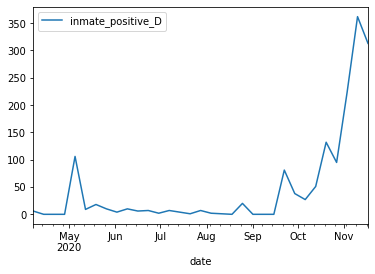

In [176]:
cases_by_week.plot()

## Create ggplot (plotnine) summary graph

In [177]:
from_week = cases_by_week.index.min().strftime('%d %b')
to_week = cases_by_week.index.max().strftime('%d %b')

In [178]:

ymax = int(round(cases_by_week.max()/100)*100)

ptitle = f'Weekly positive Covid19 cases in Pennsylvania prison\nfor weeks of {from_week} to {to_week}'



case_plot = (
    ggplot(cases_by_week) + 
    aes(x=cases_by_week.index, y='inmate_positive_D') + 
    geom_point(size=0, color='white') + 
    geom_smooth(se=False,method='loess',span=0.3, size=1.5, color='darkblue') +
    scale_x_datetime(breaks=date_breaks('1 months'), labels=date_format('%b')) + 
                    theme(panel_background = element_blank(), 
                          axis_title_y=element_text(size=10, color='darkblue'),
                          axis_text_y=element_line(color='darkblue'),
                          title=element_text(size=14),
                          axis_line_x=element_line(color='black', size=0.7),
                          axis_ticks_major_x=element_blank()
                         ) + 
                    ylim(0,ymax) +
                    ylab('Inmate Covid19 positive test result') + ggtitle(ptitle)
)

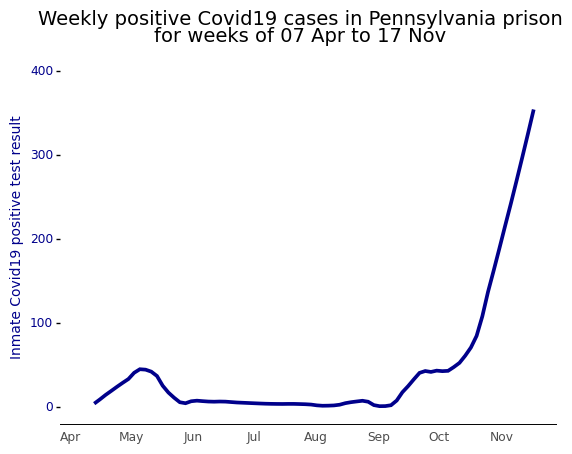

<ggplot: (331972349)>

In [179]:
case_plot

In [180]:
case_plot.save('../img/Covid19_cases_in_PA_SCI.svg')

<AxesSubplot:xlabel='date'>

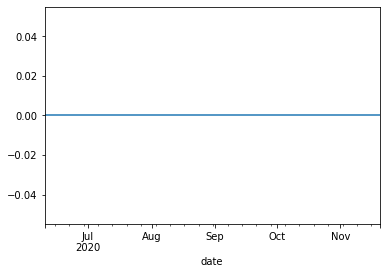

In [181]:
doc_df[doc_df['SCI']=='Waymart'].resample('D')['inmate_positive_D'].sum().plot()

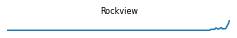

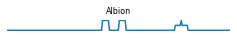

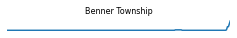

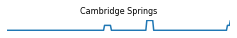

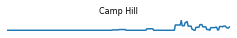

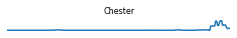

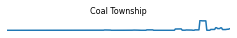

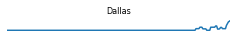

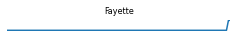

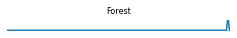

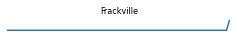

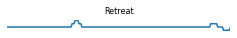

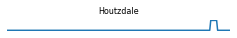

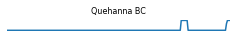

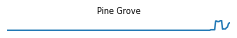

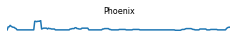

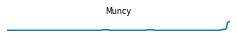

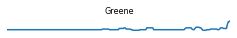

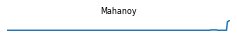

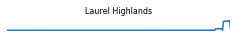

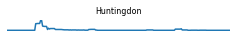

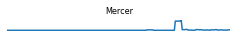

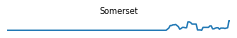

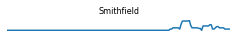

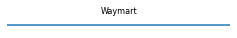

In [182]:
for SCI in doc_df['SCI'].unique():
    daily_ts = doc_df[doc_df['SCI']==SCI].resample('D')['inmate_positive_D'].sum().rolling('7D').mean()
    fig=plt.figure(figsize=(4,0.2))
    sci_plot= daily_ts.plot()
    plt.title(SCI, size=8)
    sci_plot.set_axis_off()
    plt.show()

In [188]:
def plot_SCI_sparkline(df, SCI, rolling_avg='7D'):
    '''plot a sparkline for an SCI
    
    
    '''
    daily_ts = doc_df[doc_df['SCI']==SCI].resample('D')['inmate_positive_D'].sum()
    
    if rolling_avg:
        daily_ts=daily_ts.rolling(rolling_avg).mean()
    
    xmax = daily_ts.idxmax()
    ymax = daily_ts.max()
    
    fig,ax=plt.subplots(figsize=(4,0.4))
    sci_plot= daily_ts.plot(ax=ax)
    sci_plot.set_axis_off()
    
    print(SCI, xmax, ymax)

Laurel Highlands 2020-11-13 00:00:00 256.0


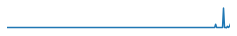

In [190]:
plot_SCI_sparkline(doc_df, 'Laurel Highlands', rolling_avg=None)

In [185]:
daily_ts.idxmax()

Timestamp('2020-06-10 00:00:00', freq='D')

In [186]:
doc_df[doc_df['SCI']=='Laurel Highlands'][['inmate_positive','inmate_positive_D']]

,inmate_positive,inmate_positive_D
date,,
2020-04-07,NaN,NaN
2020-04-08,NaN,NaN
2020-04-09,NaN,NaN
2020-04-10,NaN,NaN
2020-05-05,NaN,NaN
...,...,...
2020-11-16,298.0,-4.0
2020-11-17,314.0,16.0
2020-11-18,314.0,0.0
